<div style="text-align:center; font-family:Tahoma, Arial; line-height:1.8;">

  <div style="font-size:42px; font-weight:bold; color:#0F8298;">
    Machine Learning 13
  </div>

  <div style="font-size:28px; font-weight:600; color:#6C3BAA; margin-top:8px;">
    Clustering / DBSCAN
  </div>

  <div style="font-size:18px; color:#4b4f9c;">
</div>

Density-Based Spatial Clustering of Applications with Noise

خوشه‌بندی مکانی مبتنی بر چگالی برنامه‌های کاربردی با نویز

<hr style="width:60%; margin:20px auto; border:1px solid #ddd;">

<font color=497890 size=3>

اهداف: پس از تکمیل این جلسه، شما قادر خواهید بود


برای پیاده‌سازی رگرسیون خطی ساده استفاده کنید scikit-learnm, scipy به صورت دستی و از کتابخانه‌های

(MSE, MAE, R²)
یک مدل ایجاد کنید، آن را آموزش دهید،ارزیابی کنید و از مدل استفاده نمایید

<font color=GREEN size=5>
HAKAN Fatemi (www.hooko.ir)


____
</div> </div>

بیشتر تکنیک‌های سنتی خوشه‌بندی، مانند $k\_means$، سلسله‌مراتبی می‌توانند برای گروه‌بندی داده‌ها بدون نظارت استفاده شوند

با این حال، هنگامی که برای وظایف با خوشه‌های با شکل دلخواه، یا خوشه‌های درون خوشه‌ها اعمال می‌شوند، تکنیک‌های سنتی ممکن است نتوانند به نتایج خوبی دست یابند. یعنی عناصر در یک خوشه ممکن است شباهت کافی را به اشتراک نگذارند یا عملکرد ضعیفی داشته باشند
علاوه بر این، خوشه‌بندی مبتنی بر چگالی، مناطقی با چگالی بالا را شناسایی می‌کند که توسط مناطقی با چگالی پایین از یکدیگر جدا شده‌اندچگالی در این زمینه به عنوان تعداد نقاط درون یک شعاع مشخص تعریف می‌شود

در این بخش، تمرکز اصلی بر دستکاری داده‌ها و ویژگی‌های $DBSCAN$ و مشاهده خوشه‌بندی حاصل خواهد بود 

____
## $DBSCAN$ پارامترهای

ε = eps        شعاع همسایگی

m = minPts     حداقل نقاط برای نقطه هسته

۱. همسایگی $ε$ نقطه $p$:
$$
N_ε(p) = \{q \in D \mid \text{dist}(p,q) \le ε\}
$$

۲. نقطه هسته ($Core Point$):
$$
|N_ε(p)| \ge m
$$

۳. دسترسی مستقیم ($q$ از $p$):
$$
q \in N_ε(p) \ \text{و} \ |N_ε(p)| \ge m
$$

۴. خوشه: هر دو نقطه در خوشه باید:
   - با هم متصل باشند یا
   - از یک نقطه هسته مشترک دسترسی‌پذیر باشند

۵. نقطه مرزی ($Border$):
$$
|N_ε(p)| < m \ \text{و} \ \exists q \ \text{(هسته)} : p \in N_ε(q)
$$

۶. نقطه نویز ($Noise$):
$$
|N_ε(p)| < m \ \text{و} \ \not\exists q \ \text{(هسته)} : p \in N_ε(q)
$$
___

کتابخانه‌های زیر را وارد کنید:

- numpy as np
- DBSCAN from sklearn.cluster  
- make_blobs from sklearn.datasets.samples_generator
- StandardScaler from sklearn.preprocessing
- matplotlib.pyplot as plt

به یاد داشته باشید $\%matplotlib inline$ را برای نمایش نمودارها اضافه کنید

In [ ]:
# توجه: برای نمایش بصری نقشه، شما به بسته basemap نیاز دارید.
# اگر basemap روی سیستم شما نصب نیست، می‌توانید از خط زیر برای نصب آن استفاده کنید
# کد زیر را از حالت کامنت در بیارید و ران کنید

# توجه پایتون کمتر از 3.10 نیاز است

# !conda install -c conda-forge basemap matplotlib==3.1 -y

In [23]:
import sys
sys.executable
# !{sys.executable} -m pip install basemap

'c:\\Users\\mrb\\AppData\\Local\\Programs\\Python\\Python310\\python.exe'

In [ ]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 

### تولید داده

تابع زیر نقاط داده را تولید می‌کند و به این ورودی‌ها نیاز دارد:

- **centroidLocation**: مختصات مراکزی که داده‌های تصادفی را تولید خواهند کرد 
    - مثال: ورودی: [[4,3], [2,-1], [-1,4]]
- **numSamples**: تعداد نقاط داده‌ای که می‌خواهیم تولید شوند، تقسیم‌شده بر تعداد مراکز (تعداد مراکز تعریف‌شده در centroidLocation)
    - مثال: 1500
- **clusterDeviation**: انحراف معیار خوشه‌ها. هرچه عدد بزرگ‌تر باشد، فاصله نقاط داده درون خوشه‌ها بیشتر است.
    - مثال: 0.5

In [25]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
# داده‌های تصادفی ایجاد کنید و در ماتریس ویژگی X و بردار پاسخ y ذخیره کنید.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    X = StandardScaler().fit_transform(X)
    return X, y

از تابع **$createDataPoints$** با **3 ورودی** استفاده کنید و خروجی را در متغیرهای **$X$** و **$y$** ذخیره کنید

In [26]:
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

### مدل‌سازی

و $DBSCAN$ مخفف خوشه‌بندی فضایی مبتنی بر چگالی با نویز است

این تکنیک یکی از رایج‌ترین الگوریتم‌های خوشه‌بندی است که بر اساس چگالی اشیاء عمل می‌کند

ایده کلی این است که اگر یک نقطه خاص متعلق به یک خوشه باشد، باید به بسیاری از نقاط دیگر در آن خوشه نزدیک باشد

این الگوریتم بر اساس دو پارامتر کار می‌کند: اپسیلون و حداقل نقاط

**اپسیلون**:  یک شعاع مشخص را تعیین می‌کند که اگر تعداد کافی نقطه درون آن باشد، آن را یک منطقه پرتراکم می‌نامیم

**حداقل نمونه‌ها**: کمترین تعداد نقاط داده را در یک همسایگی تعیین می‌کند تا یک خوشه تعریف شود

In [27]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 1, 1, ..., 1, 2, 2], shape=(1500,))

### تشخیص نقاط پرت

بیایید تمام عناصر در $core\_samples\_mask$ که در خوشه هستند را با $"True"$ و نقاط پرت را با $"False"$ جایگزین کنیم.

In [28]:
# اول، یک آرایه از مقادیر بولین با استفاده از برچسب‌های db ایجاد کنید
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True], shape=(1500,))

In [29]:
# تعداد خوشه‌ها در برچسب‌ها، بدون احتساب نویز (در صورت وجود)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [30]:
#با تبدیل برچسب‌ها به یک مجموعه، تکرارها را حذف کنید.
unique_labels = set(labels)
unique_labels

{np.int64(0), np.int64(1), np.int64(2)}

### نمایش بصری داده‌ها

In [31]:
# ایجاد رنگ‌ها برای خوشه‌ها
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))


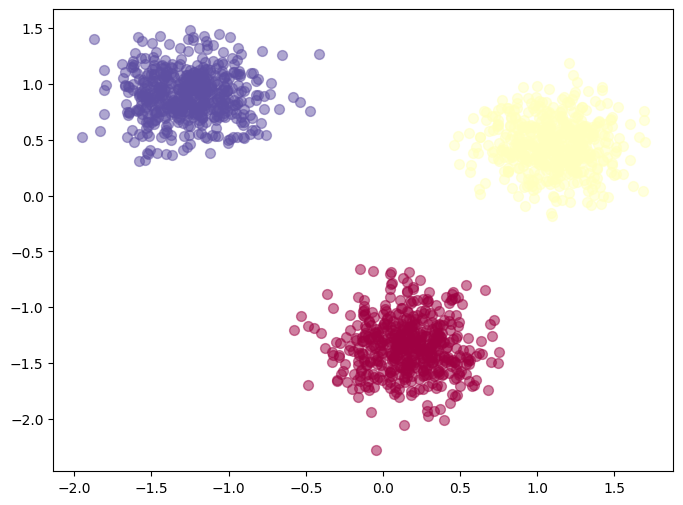

In [32]:
plt.figure(figsize=(8,6))

# نقاط را با رنگ‌ها رسم کنید
for k, col in zip(unique_labels, colors):
    if k == -1:
        # رنگ مشکی برای نویز استفاده شده است
        col = "k"

    class_member_mask = (labels == k)

    # نقاط داده‌ای که خوشه‌بندی شده‌اند را رسم کنید
    xy = X[class_member_mask & core_samples_mask]

    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u"o", alpha=0.5)

    # نقاط پرت را رسم کنید
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u"o", alpha=0.5)

## تمرین

برای درک بهتر تفاوت‌های بین خوشه‌بندی تقسیمی و مبتنی بر چگالی، سعی کنید مجموعه داده بالا را با استفاده از $k\_Means$ در 3 خوشه دسته‌بندی کنید\
توجه: داده‌ها را مجدداً تولید نکنید، از همان مجموعه داده قبلی استفاده کنید

In [33]:
# کد خود را اینجا بنویسید



<details><summary>برای مشاهده راه‌حل اینجا کلیک کنید</summary>

```python
from sklearn.cluster import KMeans 
k = 3
k_means3 = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(k), colors):
    my_members = (k_means3.labels_ == k)
    plt.scatter(X[my_members, 0], X[my_members, 1],  c=col, marker=u"o", alpha=0.5)
plt.show()

```

</details>


### $scikit$-$learn$ خوشه‌بندی ایستگاه‌های هواشناسی با استفاده از $DBSCAN$ و 

الگوریتم $DBSCAN$ به ویژه برای کارهایی مانند شناسایی کلاس در زمینه‌های فضایی بسیار مناسب است. ویژگی شگفت‌انگیز الگوریتم $DBSCAN$ این است که می‌تواند هر خوشه با شکل دلخواهی را بدون تأثیرپذیری از نویز پیدا کند. برای مثال، نمونه زیر موقعیت ایستگاه‌های هواشناسی در کانادا را خوشه‌بندی می‌کند.
\<Click 1>

در اینجا می‌توان از $DBSCAN$ استفاده کرد، برای مثال، برای یافتن گروهی از ایستگاه‌ها که شرایط آب و هوایی یکسانی را نشان می‌دهند. همانطور که می‌بینید، این الگوریتم نه تنها خوشه‌های مختلف با شکل دلخواه را پیدا می‌کند، بلکه می‌تواند بخش‌های متراکم‌تر نمونه‌های متمرکز داده را با نادیده گرفتن مناطق کم‌تراکم یا نویزها شناسایی کند

بیایید شروع به کار با داده‌ها کنیم. ما طبق گردش کار زیر عمل خواهیم کرد: </font>

1.  بارگذاری داده‌ها

*   مرور کلی داده‌ها
*   پاکسازی داده‌ها
*   انتخاب داده‌ها
*   خوشه‌بندی

### درباره مجموعه داده

<h4 align = "center">
اداره محیط زیست کانادا    
مقادیر ماهانه ژوئیه - 2015	
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
border: 1px solid #dddddd;
text-align: left;
padding: 8px;
}

tr:nth-child(even) {
background-color: #dddddd;
} </style>

</head>
<body>

<table>
  <tr>
    <th>نام در جدول</th>
    <th>معنی</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>نام ایستگاه</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>عرض جغرافیایی (شمال +، درجه)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>طول جغرافیایی (غرب -، درجه)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>استان</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>میانگین دما (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>روزهای بدون میانگین دمای معتبر</td>
  </tr>
  <tr>
    <td>D</td>
    <td>اختلاف میانگین دما از حالت نرمال (2010-1981) (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">بیشترین دمای حداکثر ماهانه (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>روزهای بدون دمای حداکثر معتبر</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">کمترین دمای حداقل ماهانه (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>روزهای بدون دمای حداقل معتبر</td>
  </tr>
  <tr>
    <td>S</td>
    <td>بارش برف (سانتی‌متر)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>روزهای بدون بارش برف معتبر</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>درصد بارش برف نرمال (2010-1981)</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>کل بارندگی (میلی‌متر)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>روزهای بدون بارندگی معتبر</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>درصد بارندگی نرمال (2010-1981)</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>برف روی زمین در پایان ماه (سانتی‌متر)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>تعداد روزهای با بارندگی ۱.۰ میلی‌متر یا بیشتر</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>ساعات آفتابی (ساعت)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>روزهای بدون ساعات آفتابی معتبر</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>درصد ساعات آفتابی نرمال (2010-1981)</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>درجه‌روز زیر ۱۸ درجه سانتی‌گراد</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>درجه‌روز بالای ۱۸ درجه سانتی‌گراد</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>شناسه ایستگاه هواشناسی (۳ رقم اول نشان‌دهنده حوضه آبریز، ۴ کاراکتر آخر برای مرتب‌سازی الفبایی هستند).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>داده موجود نیست</td>
  </tr>

</table>

</body>
</html>

### ۱-دانلود داده‌ها

In [34]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/weather-stations20140101-20141231.csv"
response = requests.get(url)

with open("weather-stations20140101-20141231.csv", "wb") as f:
    f.write(response.content)

### ۲- بارگذاری مجموعه داده

ما فایل $.csv$ را وارد کرده و سپس ستون‌های مربوط به سال، ماه و روز را ایجاد خواهیم کرد

In [35]:
import csv
import pandas as pd
import numpy as np

filename="weather-stations20140101-20141231.csv"

pdf = pd.read_csv(filename)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


### ۳- پاکسازی

بیایید سطرهایی را که هیچ مقداری در فیلد **$Tm$** ندارند، حذف کنیم

In [36]:
pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop=True)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


### ۴- نمایش بصری

نمایش ایستگاه‌ها روی نقشه با استفاده از بسته $basemap.$ ابزارک $basemap$ در $matplotlib$ یک کتابخانه برای رسم داده‌های دو بعدی روی نقشه‌ها در پایتون است. $Basemap$ به خودی‌خودی هیچ ترسیمی انجام نمی‌دهد، اما امکانات لازم برای تبدیل مختصات به پیش‌طرح‌های نقشه را فراهم می‌کند

لطفاً توجه داشته باشید که اندازه هر نقطه داده، نشان‌دهنده میانگین حداکثر دما برای هر ایستگاه در طول یک سال است

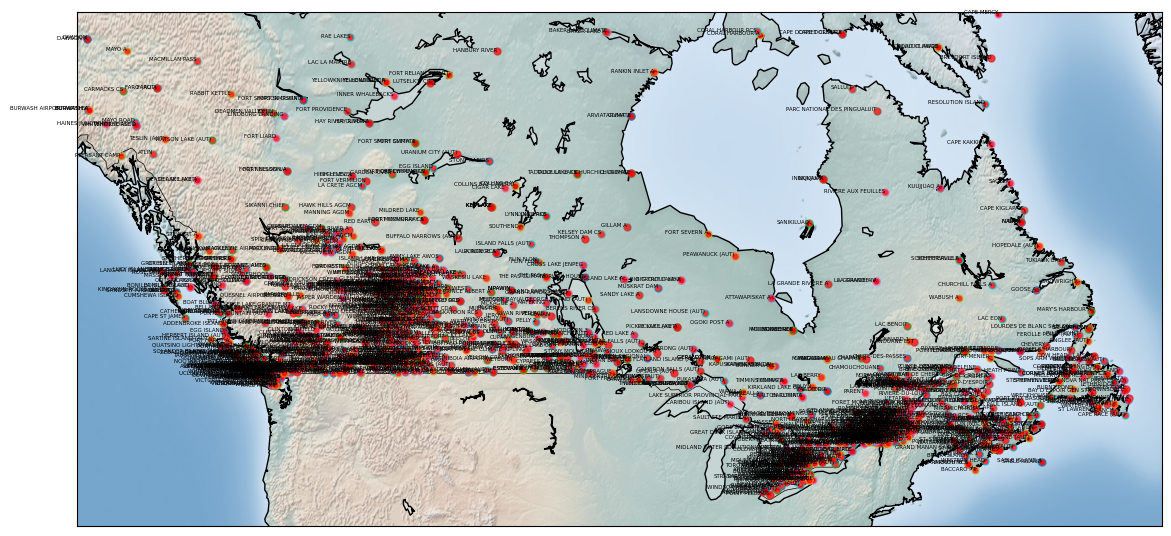

In [37]:
from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams["figure.figsize"] = (14,10)

llon=-140
ulon=-50
llat=40
ulat=65

pdf = pdf[(pdf["Long"] > llon) & (pdf["Long"] < ulon) & (pdf["Lat"] > llat) &(pdf["Lat"] < ulat)]

my_map = Basemap(projection="merc",
            resolution = "l", area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, # حداقل طول جغرافیایی (llcrnrlon) و عرض جغرافیایی (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) # حداکثر طول جغرافیایی (urcrnrlon) و عرض جغرافیایی (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()

my_map.fillcontinents(color = "white", alpha = 0.3)
my_map.shadedrelief()

# برای جمع‌آوری داده بر اساس ایستگاه‌ها
xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf["xm"]= xs.tolist()
pdf["ym"] =ys.tolist()

for index,row in pdf.iterrows():
   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker="o", markersize= 5, alpha = 0.75)
   plt.text(x, y, row["Stn_Name"], fontsize=4, color="black", ha="right")
plt.show()

### ۵- $Lon$ خوشه‌بندی ایستگاه‌ها بر اساس موقعیت جغرافیایی آنها، یعنی $Lat$ و 

**$DBSCAN$**

 از کتابخانه $sklearn$ می‌تواند خوشه‌بندی $DBSCAN$ را از آرایه برداری یا ماتریس فاصله اجرا کند. در مورد ما، آرایه $Numpy$ به نام $Clus\_dataSet$ را به آن پاس می‌دهیم تا نمونه‌های اصلی با چگالی بالا را پیدا کرده و خوشه‌ها را از آنها گسترش دهد

In [38]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

# تنظیم seed تصادفی برای تکرارپذیری نتایج 
sklearn.utils.check_random_state(1000)

# انتخاب دو ستون xm و ym از DataFrame برای خوشه‌بندی
Clus_dataSet = pdf[["xm","ym"]]

# تبدیل مقادیر NaN به صفر (حذف یا جایگزینی مقادیر NaN)
Clus_dataSet = np.nan_to_num(Clus_dataSet)

# نرمال‌سازی داده‌ها (میانگین=0، انحراف معیار=1)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# اجرای DBSCAN با شعاع 0.15 و حداقل 10 نقطه
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)

# ایجاد ماسک خالی (همه False) به اندازه labels
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

# علامت‌گذاری نقاط Core (هسته خوشه‌ها)
core_samples_mask[db.core_sample_indices_] = True

# دریافت برچسب‌های خوشه‌بندی
labels = db.labels_

# ذخیره برچسب‌ها در DataFrame اصلی
pdf["Clus_Db"]=labels

# شمارش خوشه‌های واقعی (بدون در نظر گرفتن نویز -1)
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)

# شمارش کل خوشه‌ها (با احتساب نویز)
clusterNum = len(set(labels)) 

# نمایش نام ایستگاه، دمای max، دمای mean و خوشه
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

,Stn_Name,Tx,Tm,Clus_Db
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0


همانطور که مشاهده می‌کنید، برای نقاط پرت، برچسب خوشه مقدار -1 است

In [39]:
#   شمارش تعداد نقاط در هر خوشه DBSCAN 
pdf[["Clus_Db"]].value_counts()

Clus_Db
 0         511
 3         360
-1         215
 4          42
 1          38
 2          23
Name: count, dtype: int64

In [40]:
set(labels)

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)}

### ۶- نمایش بصری خوشه‌ها بر اساس موقعیت

حال می‌توانیم خوشه‌ها را با استفاده از $basemap$ نمایش دهیم:

In [41]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

Cluster 0, Avg Temp: -5.538747553816046
Cluster 1, Avg Temp: 1.9526315789473685
Cluster 2, Avg Temp: -9.195652173913045
Cluster 3, Avg Temp: -15.300833333333333
Cluster 4, Avg Temp: -7.769047619047619


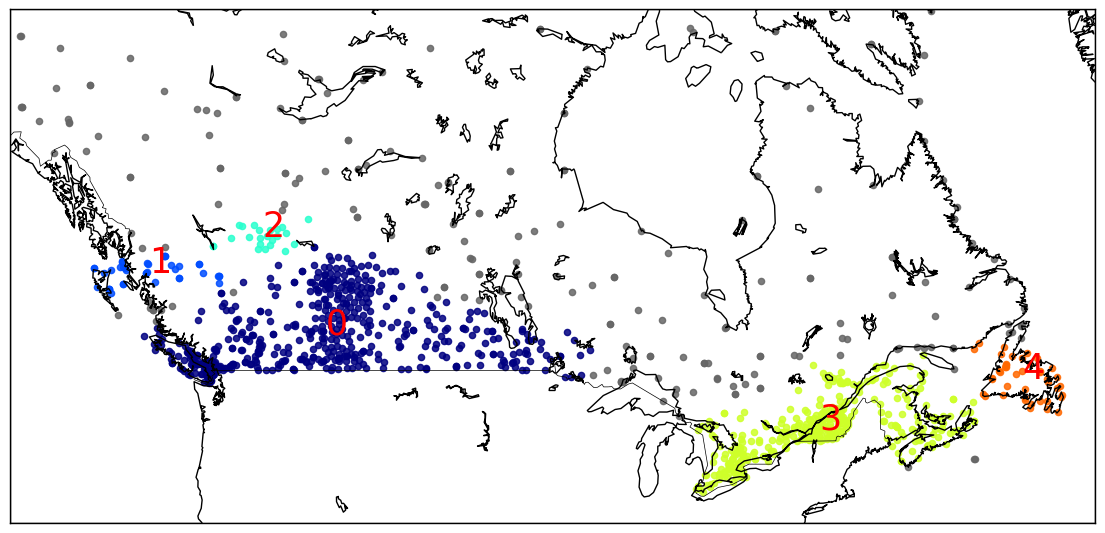

In [42]:
rcParams["figure.figsize"] = (14,10)

my_map = Basemap(projection="merc",
            resolution = "l", area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, # حداقل طول جغرافیایی (llcrnrlon) و عرض جغرافیایی (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) # حداکثر طول جغرافیایی (urcrnrlon) و عرض جغرافیایی (urcrnrlat)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = "white", alpha = 0.3)
my_map.shadedrelief()

# برای ایجاد یک نقشه رنگ
colors = plt.get_cmap("jet")(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker="o", s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color="red",)
        print ("Cluster "+str(clust_number)+", Avg Temp: "+ str(np.mean(clust_set.Tm)))

### ۷- خوشه‌بندی ایستگاه‌ها بر اساس موقعیت، میانگین، حداکثر و حداقل دما

در این بخش، $DBSCAN$ را مجدداً اجرا می‌کنیم، اما این بار روی یک مجموعه داده ۵-بعدی:

In [43]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[["xm","ym","Tx","Tm","Tn"]]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# محاسبه DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

# نمونه‌ای از خوشه‌ها
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

,Stn_Name,Tx,Tm,Clus_Db
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0


### ۸- نمایش بصری خوشه‌ها بر اساس موقعیت و دما

Cluster 0, Avg Temp: 6.221192052980132
Cluster 1, Avg Temp: 6.790000000000001
Cluster 2, Avg Temp: -0.49411764705882344
Cluster 3, Avg Temp: -13.87720930232558
Cluster 4, Avg Temp: -4.186274509803922
Cluster 5, Avg Temp: -16.301503759398496
Cluster 6, Avg Temp: -13.599999999999998
Cluster 7, Avg Temp: -9.753333333333334
Cluster 8, Avg Temp: -4.258333333333334


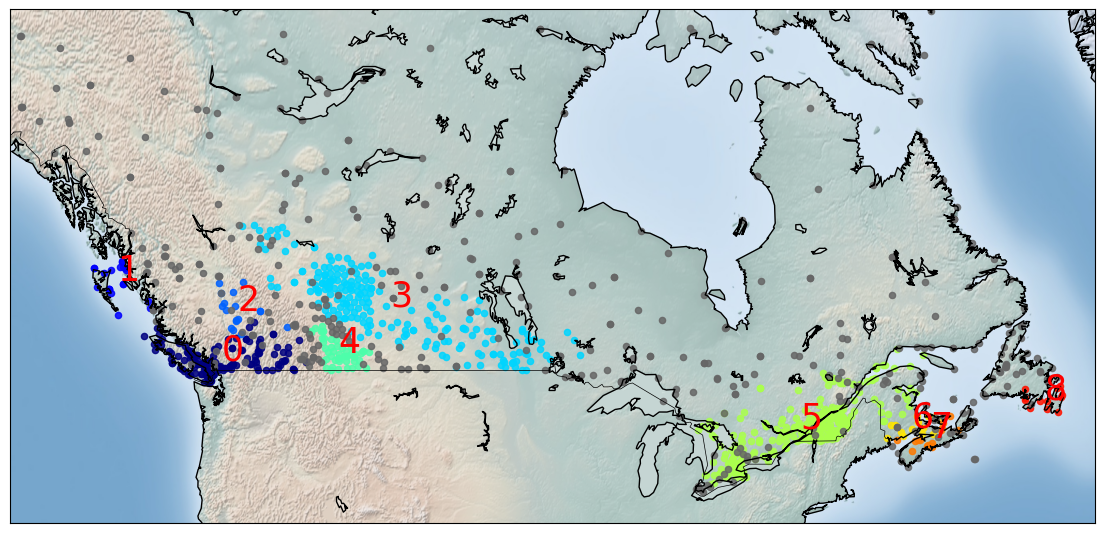

In [44]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams["figure.figsize"] = (14,10)

my_map = Basemap(projection="merc",
            resolution = "l", area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, # حداقل طول جغرافیایی (llcrnrlon) و عرض جغرافیایی (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) # حداکثر طول جغرافیایی (urcrnrlon) و عرض جغرافیایی (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()

my_map.fillcontinents(color = "white", alpha = 0.3)
my_map.shadedrelief()

# برای ایجاد یک نقشه رنگ
colors = plt.get_cmap("jet")(np.linspace(0.0, 1.0, clusterNum))



for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker="o", s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color="red",)
        print ("Cluster "+str(clust_number)+", Avg Temp: "+ str(np.mean(clust_set.Tm)))


<h2>می‌خواهید بیشتر یاد بگیرید؟</h2>

پلتفرم **هوکو** یک بستر جامع تحلیلی و هوش مصنوعی است که مجموعه‌ای از الگوریتم‌های یادگیری ماشین، ابزارهای تحلیل داده و راهکارهای پیش‌بینی هوشمند را در اختیار شما قرار می‌دهد.
این پلتفرم به شما کمک می‌کند تا تصمیم‌های دقیق‌تر، سریع‌تر و مبتنی بر داده بگیرید؛ 

چه به‌صورت فردی، چه در سطح تیمی و یا در مقیاس سازمانی

___

اکنون می‌توانید نسخه آزمایشی رایگان هوکو را فعال کرده و قدرت هوش مصنوعی را در تصمیم‌گیری‌های خود تجربه کنید

 <a href="https://hooko.ir">HOOKO.ir شروع تجربه در </a>

 ___

## Author

Mahdi Fatemi (HAKAN)

Instagram: @Fatemi_303

09220630140

## web
www.hooko.ir

## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2025-11-06 | 1.0  | HAKAN Fatemi  |  ... |

## <h3 align="center"> © HOOKO.IR Corporation. All rights reserved. <h3/>
